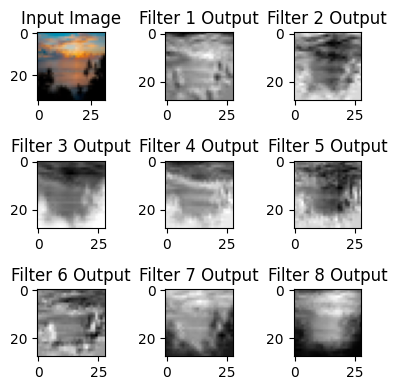

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
image = Image.open('sunset_400_dhHh1mi3o.webp')
image = image.resize((32,32))
img = np.array(image)

# Define a sample input tensor (32x32x3)
input_tensor = np.array(image)

# Define 8 sample filters (5x5x3)
num_filters = 8
filter_size = (5, 5, 3)
filter_tensors = [np.random.normal(loc=0, scale=1,size=filter_size) for _ in range(num_filters)]

# Initialize an array to store the output feature maps
output_feature_maps = []

# Define the stride
stride = 1

# Perform the convolution operation for each filter
for filter_tensor in filter_tensors:
    output_height = (input_tensor.shape[0] - filter_size[0]) // stride + 1
    output_width = (input_tensor.shape[1] - filter_size[1]) // stride + 1
    output_pixel = np.zeros((output_height, output_width))
    
    for i in range(0, input_tensor.shape[0] - filter_size[0] + 1, stride):
        for j in range(0, input_tensor.shape[1] - filter_size[1] + 1, stride):
            output_pixel[i // stride, j // stride] = np.sum(input_tensor[i:i + filter_size[0], j:j + filter_size[1], :] * filter_tensor)
    
    output_feature_maps.append(output_pixel)

# Plot the input image
plt.figure(figsize=(4, 4))
plt.subplot(3, 3, 1)
plt.imshow(input_tensor)
plt.title('Input Image')

# Plot the output feature maps for each filter
for i in range(num_filters):
    plt.subplot(3, 3, i + 2)
    plt.imshow(output_feature_maps[i], cmap='gray')
    plt.title(f'Filter {i + 1} Output')

plt.tight_layout()
plt.show()


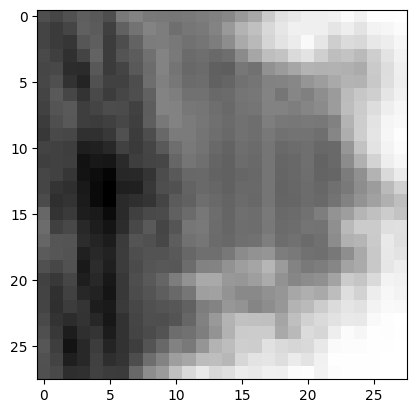

In [42]:
plt.imshow(np.array(output_feature_maps).T[ :, :, 2 ],cmap='gray')

In [28]:
#Tensor's output shape
np.array(output_feature_maps).shape
np.random.seed(10)
x = np.random.normal(0,1,(4,3,2))
print(x)
print(x.T)

[[[ 1.3315865   0.71527897]
  [-1.54540029 -0.00838385]
  [ 0.62133597 -0.72008556]]

 [[ 0.26551159  0.10854853]
  [ 0.00429143 -0.17460021]
  [ 0.43302619  1.20303737]]

 [[-0.96506567  1.02827408]
  [ 0.22863013  0.44513761]
  [-1.13660221  0.13513688]]

 [[ 1.484537   -1.07980489]
  [-1.97772828 -1.7433723 ]
  [ 0.26607016  2.38496733]]]
[[[ 1.3315865   0.26551159 -0.96506567  1.484537  ]
  [-1.54540029  0.00429143  0.22863013 -1.97772828]
  [ 0.62133597  0.43302619 -1.13660221  0.26607016]]

 [[ 0.71527897  0.10854853  1.02827408 -1.07980489]
  [-0.00838385 -0.17460021  0.44513761 -1.7433723 ]
  [-0.72008556  1.20303737  0.13513688  2.38496733]]]


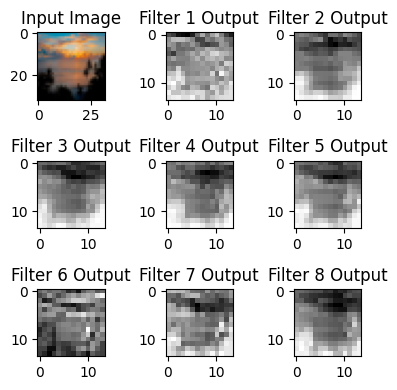

(14, 14, 8)


In [1]:
#make changes for interactive
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
image = Image.open('sunset_400_dhHh1mi3o.webp')
image = image.resize((32,32))
img = np.array(image)

# Define a sample input tensor (32x32x3)
input_tensor = np.array(image)

# Define 8 sample filters (5x5x3)
num_filters = 8
filter_size = (5, 5, 3)
filter_tensors = [np.random.normal(0,1,filter_size) for _ in range(num_filters)]

# Initialize an array to store the output feature maps
output_feature_maps = np.zeros((14, 14, num_filters))

# Define the stride
stride = 2

# Perform the convolution operation for each filter
for k, filter_tensor in enumerate(filter_tensors):
    for i in range(0, input_tensor.shape[0] - filter_size[0] + 1, stride):
        for j in range(0, input_tensor.shape[1] - filter_size[1] + 1, stride):
            output_feature_maps[i // stride, j // stride, k] = np.sum(input_tensor[i:i + filter_size[0], j:j + filter_size[1], :] * filter_tensor)

# Plot the input image
plt.figure(figsize=(4, 4))
plt.subplot(3, 3, 1)
plt.imshow(input_tensor)
plt.title('Input Image')

# Plot the output feature maps for each filter
for i in range(num_filters):
    plt.subplot(3, 3, i + 2)
    plt.imshow(output_feature_maps[:, :, i], cmap='gray')
    plt.title(f'Filter {i + 1} Output')

plt.tight_layout()
plt.show()
print(output_feature_maps.shape)